<a href="https://colab.research.google.com/github/yajuna/linearRegression/blob/master/linear_regression(version2_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we play with measured weather data and measured tree temperature, and try to fit a simple linear regression model. We will Aug 21 data for training the model, and Aug 22 to test the model.
As these two days are close, they will probably have similar weather conditions; next step is to find dates that are far apart from Aug 21, and predict the temperature from different weather condtions.



In [1]:
import numpy as np
import pandas
# import random
# from scipy import sparse
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sys
print("Python 3 version is", sys.version)
import matplotlib
print("Matplotlib version is", matplotlib.__version__)
print("Numpy version is", np.__version__)
import scipy

print("Scipy version is", scipy.__version__)

Python 3 version is 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Matplotlib version is 3.7.1
Numpy version is 1.25.2
Scipy version is 1.11.4


In [2]:
# import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

Define parameters for linear interpolation of temperature and weather data

In [3]:
# define parameter
n_t = 4000
n_x = 2000
radius = 0.135 # unit m
time = np.linspace(0, 24, n_t, endpoint = False)

## Use data from Aug 21 for training.
From tree temperature data, read core and bark temperature as indepedent variables $X$; read mid_temp1 (at depth 9cm) and mid_temp2 (at depth 4.5cm) as dependent variables $Y$.
From weather data, read wind_speed, wind_direction, humidity, temperature, air_pressure, solar_DNI. wind direction is unlikely to have a linear relation to the temperature, so we delete it from independent variables.

In [4]:
# data on Aug 21; also length of data
train_tree_temp_index = 416 - 2
train_weather_index = 145 - 2

# # data on Aug 22
# test_tree_temp_index = 827 - 2
# test_weather_index = 289 -2

# data on Aug 26
# index 2109 to 2504
test_tree_temp_index = 2504 - 2
# index 722 to 865
test_weather_index = 865 -2

train_interp_temp_size = train_tree_temp_index
train_interp_weather_size = train_weather_index

test_interp_temp_size = 395#414
test_interp_weather_size = 143

In [5]:
colnames = ['datetime', 's45_1', 'e9_1', 'n135_1','e45_2', 'n9_2', 'w135_2', 'n45_3', 'w9_3','s135_3', 'w_ext_35']
url1 = "https://raw.githubusercontent.com/yajuna/linearRegression/master/Tree_Temp_Values_AUG21_to_AUG28_2022.xlsx"
dataTemp = pandas.read_excel(url1,names=colnames)

# if use data locally:
# dataTemp = pandas.read_excel('Tree_Temp_Values_OCT21_to_OCT28_2022.xlsx', names=colnames)

# training data processing- measured temp of tree at various depths

# core temp is west, at 13.5cm, at 2m high
train_coreTemp = np.array(dataTemp.s135_3[:train_tree_temp_index])+ 273.15
# West, at 9cm, at 3m high
train_midTemp1 = np.array(dataTemp.w9_3[:train_tree_temp_index])+ 273.15
# North, at 4.5cm, at 3m high
train_midTemp2 = np.array(dataTemp.n45_3[:train_tree_temp_index])+ 273.15
# bark temp is West, at bark, at 3.5m high
train_barkTemp = np.array(dataTemp.w_ext_35[:train_tree_temp_index])+ 273.15

# linear interpolate the measured temperature
train_coreTemp = np. interp(time, np.linspace(0,24,train_interp_temp_size),train_coreTemp)
train_midTemp1 = np. interp(time, np.linspace(0,24,train_interp_temp_size),train_midTemp1)
train_midTemp2 = np. interp(time, np.linspace(0,24,train_interp_temp_size),train_midTemp2)
train_barkTemp = np. interp(time, np.linspace(0,24,train_interp_temp_size),train_barkTemp)

# testing data processing- measured temp of tree at various depths

##########change hard coding
### Data in Aug 26 with index 2109:2504
### Data in Aug 22 with index 417:812
# core temp is west, at 13.5cm, at 2m high
test_coreTemp = np.array(dataTemp.s135_3[2109:2504])+ 273.15
# West, at 9cm, at 3m high
test_midTemp1 = np.array(dataTemp.w9_3[2109:2504])+ 273.15
# North, at 4.5cm, at 3m high
test_midTemp2 = np.array(dataTemp.n45_3[2109:2504])+ 273.15
# bark temp is West, at bark, at 3.5m high
test_barkTemp = np.array(dataTemp.w_ext_35[2109:2504])+ 273.15

# linear interpolate the measured temperature
test_coreTemp = np. interp(time, np.linspace(0,24,test_interp_temp_size),test_coreTemp)
test_midTemp1 = np. interp(time, np.linspace(0,24,test_interp_temp_size),test_midTemp1)
test_midTemp2 = np. interp(time, np.linspace(0,24,test_interp_temp_size),test_midTemp2)
test_barkTemp = np. interp(time, np.linspace(0,24,test_interp_temp_size),test_barkTemp)

print("measured temperature data read")

# initial tree temperature linearly interpolated
# initTemp = np.array([test_coreTemp[0], test_midTemp1[0], test_midTemp2[0], test_barkTemp[0]])
# init_temp = np.interp(np.linspace(0,radius,n_x), np.linspace(0,radius,initTemp.size), initTemp)

measured temperature data read


In [6]:
# # plot train temp
# fig1, ax = plt.subplots()
# ax.plot(time, train_coreTemp)

# ax.set(xlabel='time (hrs)', ylabel='Temperature (K)',
#        title='Core temperature in 24 hours')
# ax.set_ylim(294, 303)
# ax.grid()

# fig1.savefig("coreTemp.eps")
# # plt.show()

# fig1, ax = plt.subplots()
# ax.plot(time, train_barkTemp)

# ax.set(xlabel='time (hrs)', ylabel='Temperature (K)',
#        title='Bark temperature in 24 hours')
# ax.set_ylim(294, 303)
# ax.grid()

# fig1.savefig("barkTemp.eps")
# plt.show()

In [7]:
### Read weather data

colnames = ['datetime', 'wind_speed', 'wind_direction', 'humidity', 'air_temperature', 'air_pressure', 'solar_DNI']
url2 = "https://raw.githubusercontent.com/yajuna/linearRegression/master/Weather_Station_AUG21_to_AUG28_2022.xlsx"
dataWeather = pandas.read_excel(url2,names=colnames)

# if use locally:
# dataWeather = pandas.read_excel('Weather_Station_OCT21_to_OCT28_2022.xlsx', names = colnames)


#### training
# wind speed from Aug 21
train_windSpeed = np.array(dataWeather.wind_speed[:train_weather_index])
# humidity from Aug 21
train_humidity = np.array(dataWeather.humidity[:train_weather_index])
# air temperature from Aug 21
train_airTemp = np.array(dataWeather.air_temperature[:train_weather_index])+ 273.15
# air pressure from Aug 21
train_airPressure = np.array(dataWeather.air_pressure[:train_weather_index])
# solar radiation from Aug 21
train_solar = np.array(dataWeather.solar_DNI[:train_weather_index])

### linear interpret
train_airTemp = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,train_interp_weather_size),train_airTemp)
train_windSpeed = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,train_interp_weather_size),train_windSpeed)
train_solar = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,train_interp_weather_size),train_solar)

train_humidity = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,train_interp_weather_size),train_humidity)
train_airPressure = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,train_interp_weather_size),train_airPressure)
#### testing from Aug 26
## index is 722:865
#### testing from Aug 22
## index is 146:289
# wind speed
test_windSpeed = np.array(dataWeather.wind_speed[722:865])
# humidity
test_humidity = np.array(dataWeather.humidity[722:865])
# air temperature
test_airTemp = np.array(dataWeather.air_temperature[722:865])+ 273.15
# air pressure
test_airPressure = np.array(dataWeather.air_pressure[722:865])
# solar radiation
test_solar = np.array(dataWeather.solar_DNI[722:865])

print(test_airTemp.size)

test_airTemp = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,test_interp_weather_size),test_airTemp)
test_windSpeed = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,test_interp_weather_size),test_windSpeed)
test_solar = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,test_interp_weather_size),test_solar)

test_humidity = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,test_interp_weather_size),test_humidity)
test_airPressure = np.interp(np.linspace(0,24,n_t), np.linspace(0,24,test_interp_weather_size),test_airPressure)

print("weather data read")

143
weather data read


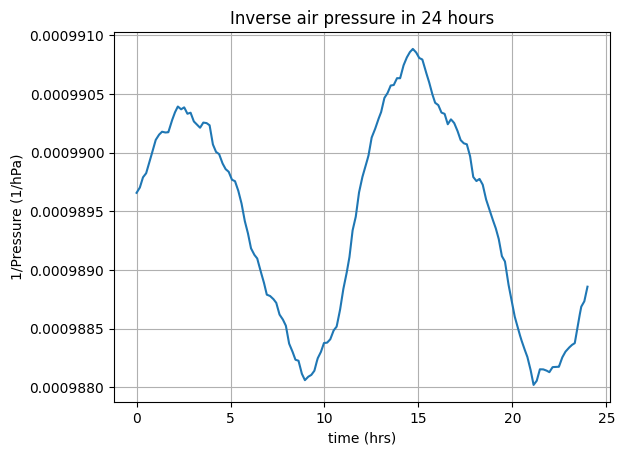

In [8]:
# plot train weather
# import matplotlib.ticker as mtick
fig2, ax = plt.subplots()
ax.plot(time, 1./train_airPressure)
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
ax.set(xlabel='time (hrs)', ylabel='1/Pressure (1/hPa)',
       title='Inverse air pressure in 24 hours')
ax.grid()

fig2.savefig("train_airPressure_inv.eps")
plt.show()

# Prepare training and testing data


In [9]:
#include depth as training variable
# n = 0 for 9cm; n = 1 for 4.5cm
n = 0
depth_list =  [0.09/radius, 0.045/radius]#[9/radius, 4.5/radius]#

# training Y temp
Ytrain_list = [train_midTemp1, train_midTemp2]

Ytest_list = [test_midTemp1, test_midTemp2]

# depth for training is depth1 or depth2
depth = np.ones(train_coreTemp.shape) * depth_list[n]

# include initial temperature
ic_train = np.ones(train_coreTemp.shape) * Ytrain_list[n][0]

# Training data in x; training data in y
Xtrain = [1./train_humidity, train_airTemp, train_windSpeed, train_solar, ic_train, depth, train_coreTemp, train_barkTemp]
for j in range(7):
  print(Xtrain[j].size)
X_train = np.array(Xtrain).T
Y_train = Ytrain_list[n]

# testing data in x, testing data in y.
ic_test = np.ones(test_coreTemp.shape) * Ytest_list[n][0]
Xtest = [1./test_humidity, test_airTemp, test_windSpeed, test_solar, ic_test, depth, test_coreTemp, test_barkTemp]
X_test = np.array(Xtest).T
Y_test = Ytest_list[n]

4000
4000
4000
4000
4000
4000
4000


In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
predictions = model.predict(X_test)

In [13]:
print(
  'mean_squared_error : ', mean_squared_error(Y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(Y_test, predictions))

print('max error:', max(abs(Y_test - predictions)))

mean_squared_error :  0.01949513551092335
mean_absolute_error :  0.11552662752216429
max error: 0.38905783546692874


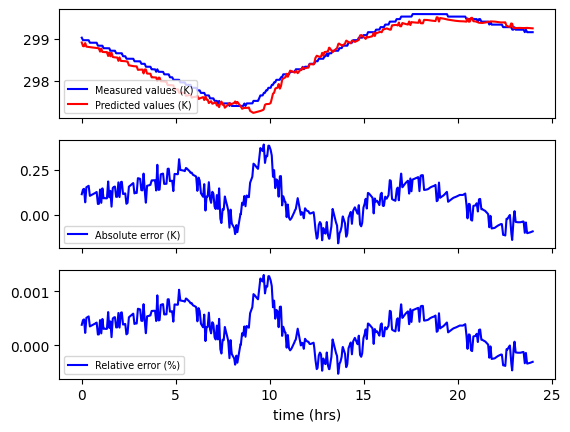

In [14]:
# visualization

fig, axs = plt.subplots(3, sharex=True, sharey=False)
# fig.suptitle('Measured temperature, predicted temperature, absolute, and relative error')
axs[0].plot(time, Y_test, 'b-', label='Measured values (K)')
axs[0].plot(time, predictions, 'r-', label='Predicted values (K)')
axs[1].plot(time, Y_test - predictions, 'b-', label='Absolute error (K)')
axs[2].plot(time, (Y_test - predictions)/Y_test, 'b-', label='Relative error (%)')
axs[0].legend(loc='lower left', fontsize = 'x-small')
axs[1].legend(loc='lower left', fontsize = 'x-small')
axs[2].legend(loc='lower left', fontsize = 'x-small')
plt.xlabel('time (hrs)', fontsize=10)
fig.savefig("test5.1.eps")
plt.show()